# GAMASI: Generic Asynchronous Multi-Agent Simulation Invoker

## Running simulation

In [1]:
import numpy as np

from src.Lab import Lab

lab = Lab()

In [2]:
simulation = lab.experiment(
    height=80, width=160,
    initial_population_count=1000,
    max_total_duration=60, max_simulation_duration=2
)

Generating universe...	: Done in 0.059 s


Running simulation	: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

Interrupting population	: 719...
Simulation succeed...	: Returning data... Done in 2.367 s


## Analysis

### Statistics

#### Gathering & computing

In [3]:
print(simulation["universe"].population[2].death_date)

2308177800


In [4]:
data = lab.gather_data(simulation)

Computing agents statistics	: 100%|██████████| 2074/2074 [00:00<00:00, 9531.92it/s]


In [5]:
data["agents_statistics"]

,generation,parents_count,dead,lifespan,children_count,birth_success,travelled_distance,actions_count,min_decision_duration,max_decision_duration,...,min_action_duration,max_action_duration,mean_action_duration,median_action_duration,std_action_duration,min_round_duration,max_round_duration,mean_round_duration,median_round_duration,std_round_duration
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,True,612959555,0,True,29,6,0,95761,...,731,712713353,1.240930e+07,6.477000e+03,8.251651e+07,3577,80015725,7.758982e+06,5212528.0,9.533286e+06
1,0,1,True,241858366,0,True,0,6,0,21291,...,8015,341652931,1.540896e+08,1.373488e+08,1.441091e+08,4218,166745694,8.061946e+07,75108454.0,8.350724e+07
2,0,1,True,2208321178,1,True,25,6,0,41007,...,1282,2308177800,4.725771e+07,6.382000e+03,2.963129e+08,2575,1579875826,2.538300e+07,5172913.0,1.688654e+08
3,0,1,False,2266893132,2,True,15,6,0,36369,...,1072,1775069871,5.841982e+07,6.813000e+03,2.923859e+08,167737,1775241775,6.042187e+07,5184555.0,2.947711e+08
4,0,1,True,2201442034,1,True,48,6,0,20400072,...,3858,2301348921,5.217287e+07,6.833000e+03,3.129591e+08,2825,1653978692,2.751803e+07,5162203.0,1.843809e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2,1,True,4569,0,False,0,6,0,0,...,2325643252,2325647821,2.325646e+09,2.325646e+09,3.230771e+03,4569,4569,4.569000e+03,4569.0,NaN
2070,2,1,True,4258,0,False,0,6,0,0,...,2325711692,2325715950,2.325714e+09,2.325714e+09,3.010861e+03,4258,4258,4.258000e+03,4258.0,NaN
2071,1,1,True,4579,0,False,0,6,0,0,...,2325785581,2325790160,2.325788e+09,2.325788e+09,3.237842e+03,4579,4579,4.579000e+03,4579.0,NaN


In [6]:
data["agents_statistics"].to_csv("results/data.csv")

In [7]:
data["population_statistics"]

,min,max,mean,median,std
data,,,,,
lifespan,2374,2266893132,9.320199e+08,4.228130e+08,9.627881e+08
children_count,0,3,5.178399e-01,0.000000e+00,6.014294e-01
birth_success,False,True,6.711668e-01,1.000000e+00,4.699025e-01
travelled_distance,0,160,8.133558e+00,2.000000e+00,1.476139e+01
actions_count,6,6,6.000000e+00,6.000000e+00,0.000000e+00
mean_decision_duration,0.0,63174571.0,5.421175e+05,1.384830e+04,3.487615e+06
mean_action_duration,635987.219713,2325955928.0,8.924358e+08,2.913312e+08,9.817706e+08
mean_round_duration,2374.0,1089120934.5,8.722122e+07,1.160759e+07,1.517554e+08


#### Plotting some stats

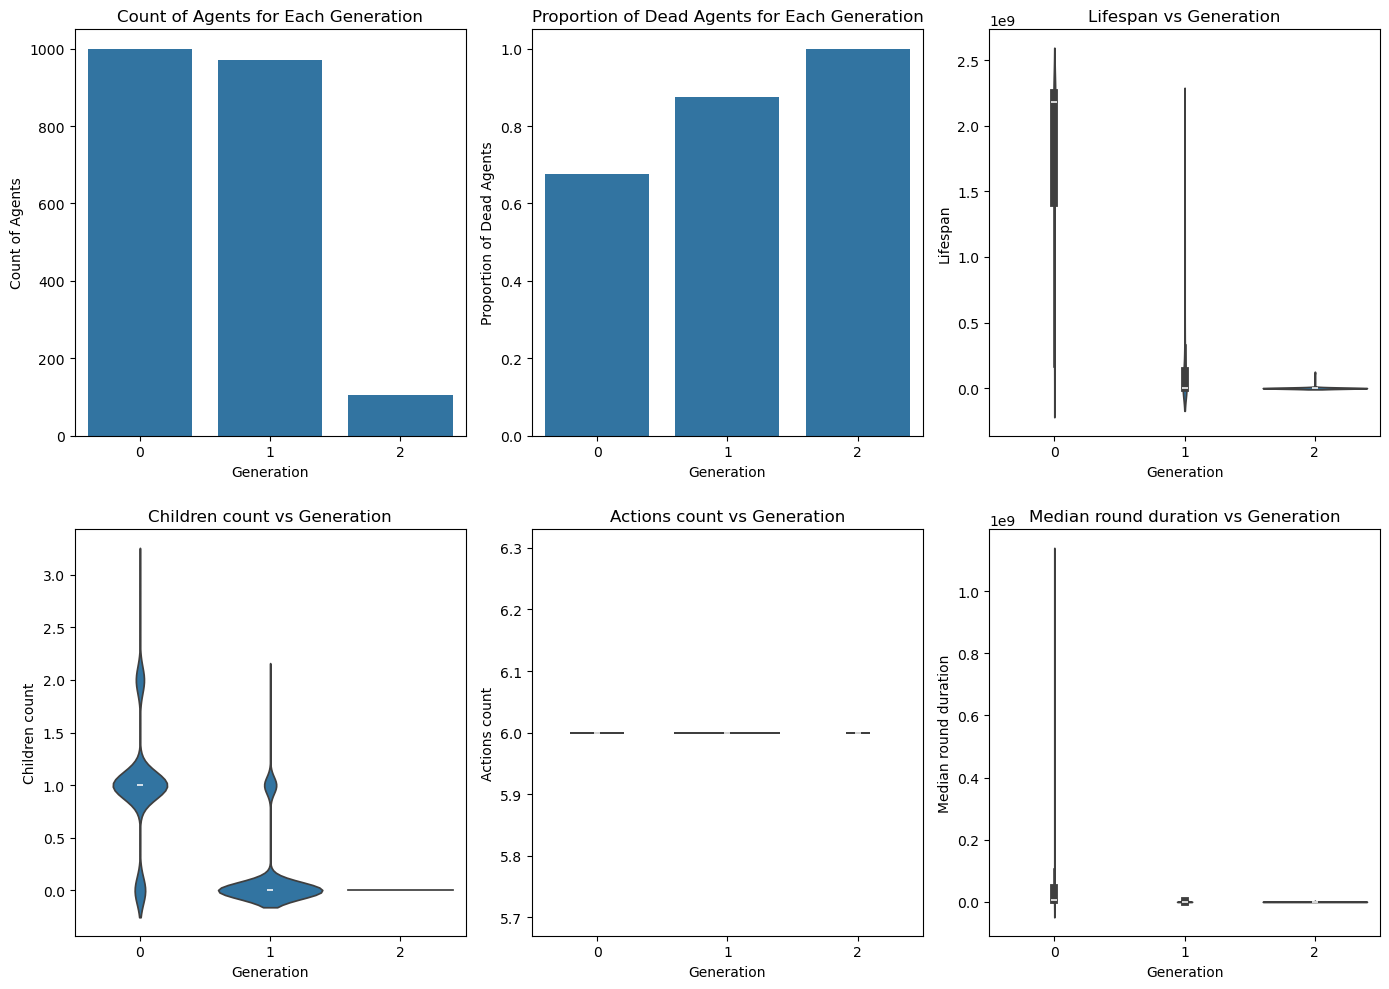

In [8]:
lab.plot_generation_stats(data)

### Timelines

#### Population count

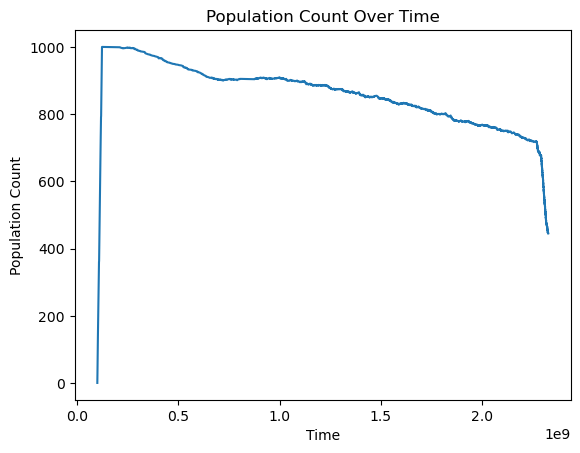

In [9]:
from matplotlib import pyplot as plt  # TODO Move to Lab
data["population_timeline"].plot(y="population_count", legend=False)
plt.title('Population Count Over Time')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.show()

#### Spatial evolution

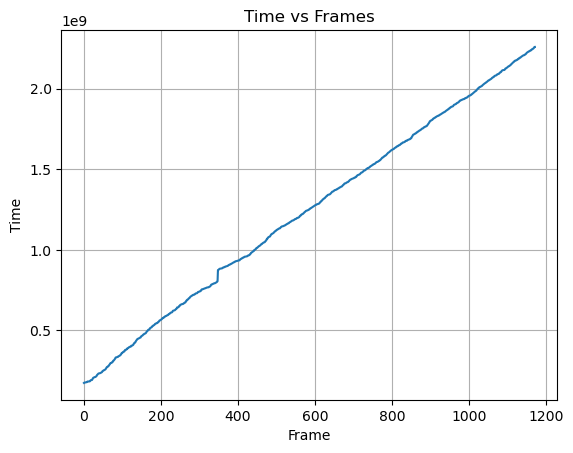

1172


In [10]:
import matplotlib.pyplot as plt

positions = data["positions"][0]

plt.plot(range(len(positions)), positions)
plt.xlabel('Frame')
plt.ylabel('Time')
plt.title('Time vs Frames')
plt.grid(True)
plt.show()
print(len(data["positions"][1]))

In [11]:
import imageio


gif_path = "results/output.gif"
imageio.mimsave(gif_path, data["positions"][1], duration=0.01, loop=0)

In [12]:
from IPython.display import HTML
width = 1000
# Generate HTML to display the GIF with specified width and interpolation
html_code = f'<img src="{gif_path}" width="{width}" style="image-rendering: pixelated;">'
HTML(html_code)

In [13]:
import numpy as np
import tifffile

# Convert the list of 2D arrays into a 3D numpy array
stack_3d = np.stack(data["positions"][1], axis=0)

# Save the stack as a TIFF file
tifffile.imwrite('results/stacks/positions.tif', stack_3d)

In [14]:
import json

with open('results/positions.json', 'w') as json_file:
    json.dump(data["positions"][2], json_file)

In [15]:
import json

with open('results/timestamps.json', 'w') as json_file:
    json.dump(data["positions"][0], json_file)

In [16]:
len(data["positions"][2])

1172

In [17]:
len(data["positions"][0])

1172

[ 174708542  176848050  177771342 ... 2253555109 2258591294 2258779910]
[1 2 2 ... 1 1 1]


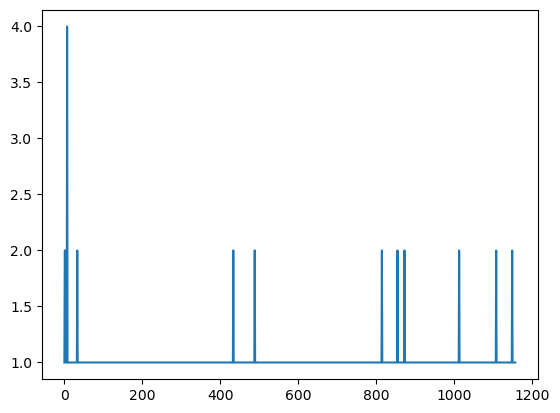

In [18]:
unique_values, counts = np.unique(data["positions"][0], return_counts=True)
print(unique_values)
print(counts)
# Creating bar plot
plt.plot(counts)


#### Actions

In [19]:
timeline = lab.get_timeline(simulation)
timeline

,reaction_time,decision_time,decision,action_time,action_success
id,,,,,
0,0,0,Abilities.spawn,99753798,True
0,0,0,Abilities.start,179769523,True
0,184978254,185000496,Abilities.idle,185003522,True
0,190215849,190231399,Abilities.eat_top,190236288,False
0,195374465,195407317,Abilities.eat_left,195417647,False
...,...,...,...,...,...
2071,0,0,Abilities.die,2325790160,True
2072,0,0,Abilities.spawn,2325873497,True
2072,0,0,Abilities.die,2325878617,True


In [20]:
timeline = timeline.sort_values(by="action_time")
timeline

,reaction_time,decision_time,decision,action_time,action_success
id,,,,,
0,0,0,Abilities.spawn,99753798,True
1,0,0,Abilities.spawn,99794565,True
2,0,0,Abilities.spawn,99856622,True
3,0,0,Abilities.spawn,99881098,True
4,0,0,Abilities.spawn,99906887,True
...,...,...,...,...,...
2072,0,0,Abilities.die,2325878617,True
1388,2218897740,2218928598,Abilities.reproduce,2325888225,False
2073,0,0,Abilities.spawn,2325953278,True


In [21]:
timeline.to_csv("results/timeline.csv")

In [22]:
agents_data = lab.get_agents_data(simulation)
agents_data.to_csv("results/agents_data.csv")

### Relations

In [23]:
from pyvis.network import Network

g = Network(notebook=True)
g.add_nodes([1,2,3], value=[10, 100, 400],
                         title=['I am node 1', 'node 2 here', 'and im node 3'],
                         x=[21.4, 54.2, 11.2],
                         y=[100.2, 23.54, 32.1],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['#00ff1e', '#162347', '#dd4b39'])

#g.show('results/relations.html')

## Miscellaneous

In [24]:
from src.Brain import Abilities

eat = [Abilities.eat_bot, Abilities.eat_right, Abilities.eat_left, Abilities.eat_top]
eating = [a for a in simulation["universe"].population[11].actions if a[2] in eat]
eating_success = [a for a in eating if a[4]]
print(len(simulation["universe"].population[11].actions), len(eating), len(eating_success))
for a in eating_success:
    print(a)

IndexError: string index out of range

In [ ]:
max_death_date = 0
last_dead = -1

for a in simulation["universe"].population.values():
    if a.death_date > max_death_date:
        max_death_date = a.death_date
        last_dead = a.id
simulation["universe"].population[last_dead].phenome.color